<img src="hotel_reception.jpeg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

## Hotel Data Analysis Using Pandas

<hr style="margin-bottom: 40px;">

## Load Data!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Main data is excel sheet divided in 3 sheets, use concat to pull together as 1 df
df = pd.concat(pd.read_excel(io='hotel_revenue_historical_only.xlsx',sheet_name=None, parse_dates=True), ignore_index=True)

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29


In [4]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [5]:
# load Discount data
df_disc = pd.read_excel(io='hotel_meal_and_discount.xlsx',sheet_name='market_segment', parse_dates=True)
df_disc

,Discount,market_segment
0,0.00,Undefined
1,0.10,Direct
2,0.10,Groups
3,0.15,Corporate
4,0.20,Aviation
5,0.30,Offline TA/TO
6,0.30,Online TA
7,1.00,Complementary


In [6]:
# Join the discount price data
df = pd.merge(df, df_disc, how='left', left_on='market_segment', right_on='market_segment')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141947 entries, 0 to 141946
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           141947 non-null  object        
 1   is_canceled                     141947 non-null  int64         
 2   lead_time                       141947 non-null  int64         
 3   arrival_date_year               141947 non-null  int64         
 4   arrival_date_month              141947 non-null  object        
 5   arrival_date_week_number        141947 non-null  int64         
 6   arrival_date_day_of_month       141947 non-null  int64         
 7   stays_in_weekend_nights         141947 non-null  int64         
 8   stays_in_week_nights            141947 non-null  int64         
 9   adults                          141947 non-null  int64         
 10  children                        141939 non-null  float64

In [7]:
# load meal price data
df_meal = pd.read_excel(io='hotel_meal_and_discount.xlsx',sheet_name='meal_cost', parse_dates=True)
df_meal

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [8]:
# Join the meal price data
df = pd.merge(df, df_meal, how='left', left_on='meal', right_on='meal')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141947 entries, 0 to 141946
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           141947 non-null  object        
 1   is_canceled                     141947 non-null  int64         
 2   lead_time                       141947 non-null  int64         
 3   arrival_date_year               141947 non-null  int64         
 4   arrival_date_month              141947 non-null  object        
 5   arrival_date_week_number        141947 non-null  int64         
 6   arrival_date_day_of_month       141947 non-null  int64         
 7   stays_in_weekend_nights         141947 non-null  int64         
 8   stays_in_week_nights            141947 non-null  int64         
 9   adults                          141947 non-null  int64         
 10  children                        141939 non-null  float64

In [9]:
# add total_stay_night
df['total_stay_night']=(df['stays_in_weekend_nights']+df['stays_in_week_nights'])
# add revenue column by multiply date stay and adr (avg daily rate) and discount
df['revenue'] = df['total_stay_night']*df['adr']*df['Discount']

In [10]:
df['revenue'].head()

0     73.80
1     94.95
2    147.60
3    224.70
4    108.30
Name: revenue, dtype: float64

<hr style="margin-bottom: 40px;">

### 1. Is our hotel revenue growing by the year?

In [20]:
# year_revenue=df.groupby(['arrival_date_year'])['revenue'].sum().reset_index()
# year_revenue
date_revenue = df.groupby('reservation_status_date')['revenue'].sum().reset_index()
date_revenue.head()

,reservation_status_date,revenue
0,2014-10-17,4521.600
1,2014-11-18,0.000
2,2018-01-01,10259.785
3,2018-01-02,107.898
4,2018-01-18,0.000


C:\Users\edwin\AppData\Local\Temp/ipykernel_14220/2928801050.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ch.set_xticklabels(labels=filt['reservation_status_date'], rotation=45)


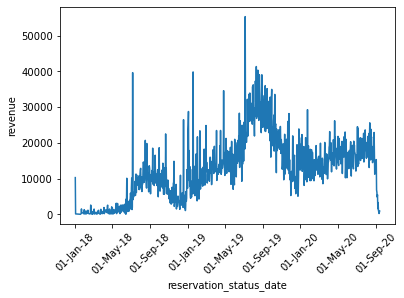

In [58]:
from matplotlib import dates
import seaborn as sns
filt=date_revenue[date_revenue['reservation_status_date']>='1/1/2018']
fig, ax = plt.subplots()
ch = sns.lineplot(data=filt, x='reservation_status_date', y='revenue')
ch.set_xticklabels(labels=filt['reservation_status_date'], rotation=45)
ax.xaxis.set_major_formatter(dates.DateFormatter('%d-%b-%y'))
plt.show()

In [13]:
year_revenue_perhotel=df.groupby(['reservation_status_date', 'hotel'])['revenue'].sum().unstack().reset_index()
year_revenue_perhotel

hotel,arrival_date_year,City Hotel,Resort Hotel
0,2018,7.050551e+05,8.529820e+05
1,2019,3.837424e+06,2.604962e+06
2,2020,2.626905e+06,1.702949e+06


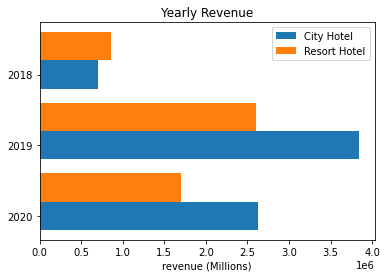

In [14]:
# year_revenue_perhotel.plot(kind='bar')
width=0.4
fig, ax = plt.subplots()
ax.barh(year_revenue_perhotel['arrival_date_year'].sort_values(ascending=False), 
        year_revenue_perhotel['City Hotel'], width)
ax.barh(year_revenue_perhotel['arrival_date_year'].sort_values(ascending=False) + width, 
        year_revenue_perhotel['Resort Hotel'], width)
ax.set_title('Yearly Revenue')
ax.set_yticks(year_revenue_perhotel['arrival_date_year'])
ax.set_yticklabels(sorted(list(year_revenue_perhotel['arrival_date_year']), reverse=True))
ax.set_xlabel('revenue (Millions)')
ax.legend(['City Hotel', 'Resort Hotel'])
plt.show()

## Conclusion 1:
#### Overall revenue trend is increasing, dropped if compared by year due to <span style="color:blue"> 2020 data is only until August </span>

<hr style="margin-bottom: 40px;">

## Question 2:
#### Should we increase our parking lot size?

In [16]:
df_cars = df.groupby('arrival_date_year').apply(lambda x: pd.DataFrame([[x['required_car_parking_spaces'].sum(),
                                                                        x['total_stay_night'].sum(),
                                                                       x['required_car_parking_spaces'].sum()/x['total_stay_night'].sum()*100]], 
                                                                       columns=['park_space', 'total_nights', 'park_space_percentage']))
df_cars

,,park_space,total_nights,park_space_percentage
arrival_date_year,,,,
2018,0,1352,74588,1.812624
2019,0,5230,265856,1.967230
2020,0,2237,145450,1.537986


## Conclusion 2:
#### There are only <span style="color:blue;font-size:18.0pt"> \<2% </span> of car parking used per year, no need to increase parking space

<hr style="margin-bottom: 40px;">

## Export the data to CSV for Further Visualization

In [62]:
df.to_csv('combined_hotel_data.csv', index=False)